In [1]:
import gzip
import shutil

with gzip.open('ADMISSIONS.csv.gz', 'rb') as f_in:
    with open('admissions.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('NOTEEVENTS.csv.gz', 'rb') as f_in:
    with open('note_events.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

with gzip.open('PATIENTS.csv.gz', 'rb') as f_in:
    with open('patients.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import spacy

In [2]:
admissions_df = pd.read_csv('admissions.csv')
notes_df = pd.read_csv('note_events.csv')

KeyboardInterrupt: 

In [ ]:
admissions_df.head()

In [5]:
admissions_df['MARITAL_STATUS'].value_counts()

MARRIED              24239
SINGLE               13254
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [6]:
notes_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [7]:
notes_df['CATEGORY'].value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [8]:
patient_details = admissions_df[['SUBJECT_ID', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS']]
notes_summary = notes_df[['SUBJECT_ID', 'CATEGORY', 'TEXT']]

In [9]:
social_work_only = notes_summary[notes_summary['CATEGORY'] == 'Social Work']

In [10]:
notes_summary_discharge_only = notes_summary[notes_summary['CATEGORY'] == 'Discharge summary']

In [11]:
patient_details['ETHNICITY'].value_counts()

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

In [12]:
race_conversions = {'WHITE' : 'WHITE', 
'BLACK/AFRICAN AMERICAN' : 'BLACK', 
'UNKNOWN/NOT SPECIFIED' : 'UNKNOWN', 
'HISPANIC OR LATINO' : 'HISPANIC', 
'OTHER' : 'OTHER',
'ASIAN' : 'ASIAN', 
'UNABLE TO OBTAIN' : 'UNKNOWN', 
'PATIENT DECLINED TO ANSWER' : 'UNKNOWN',
'ASIAN - CHINESE' : 'ASIAN',
'HISPANIC/LATINO - PUERTO RICAN' : 'HISPANIC',
'BLACK/CAPE VERDEAN' : 'BLACK',
'WHITE - RUSSIAN' : 'WHITE',
'MULTI RACE ETHNICITY'  : 'OTHER',
'BLACK/HAITIAN' : 'BLACK',
'ASIAN - ASIAN INDIAN': 'ASIAN',
'WHITE - OTHER EUROPEAN' : 'WHITE',
'HISPANIC/LATINO - DOMINICAN' : 'HISPANIC',
'PORTUGUESE' : 'OTHER',
'WHITE - BRAZILIAN' : 'WHITE',
'ASIAN - VIETNAMESE' : 'ASIAN',
'AMERICAN INDIAN/ALASKA NATIVE' : 'OTHER',
'BLACK/AFRICAN' : 'BLACK',
'MIDDLE EASTERN' : 'WHITE',
'HISPANIC/LATINO - GUATEMALAN' : 'HISPANIC',
'ASIAN - FILIPINO' : 'ASIAN', 
'WHITE - EASTERN EUROPEAN' : 'WHITE',
'HISPANIC/LATINO - CUBAN' : 'HISPANIC',
'HISPANIC/LATINO - SALVADORAN' : 'HISPANIC',
'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' : 'ASIAN',
'ASIAN - CAMBODIAN' : 'ASIAN',
'ASIAN - OTHER' : 'ASIAN',
'ASIAN - KOREAN' : 'ASIAN',
'HISPANIC/LATINO - MEXICAN' : 'HISPANIC',
'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)' : 'HISPANIC', 
'HISPANIC/LATINO - COLOMBIAN' : 'HISPANIC',
'CARIBBEAN ISLAND' : 'OTHER',
'SOUTH AMERICAN' : 'HISPANIC',
'ASIAN - JAPANESE' : 'ASIAN',
'ASIAN - THAI' : 'ASIAN',
'HISPANIC/LATINO - HONDURAN' : 'HISPANIC', 
'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE' : 'OTHER'}

In [13]:
def get_race(ethnicity):
    return race_conversions[ethnicity]

In [14]:
patient_details['RACE'] = patient_details['ETHNICITY'].apply(get_race)

C:\Users\aurno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
patient_details['RACE'].value_counts().sum()

58976

In [16]:
import seaborn as sns
#sns.countplot(x='RACE', data=patient_details)

In [17]:
subject_race = patient_details[['SUBJECT_ID', 'RACE']]

In [18]:
subject_notes = social_work_only['SUBJECT_ID'].value_counts().rename_axis('SUBJECT_ID').reset_index(name='Notes')

In [19]:
summary = pd.merge(subject_race, subject_notes, on = ['SUBJECT_ID'])

In [20]:
summary = summary.drop_duplicates()

In [21]:
race_note_count = summary[['RACE', 'Notes']]

In [22]:
race_note_count['RACE'].value_counts()

WHITE       987
BLACK       126
UNKNOWN      84
HISPANIC     71
OTHER        49
ASIAN        33
Name: RACE, dtype: int64

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Unique Subject Count')

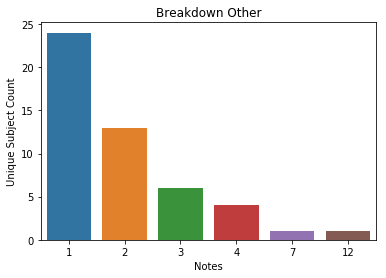

In [42]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['OTHER'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['OTHER'])
plt.title('Breakdown Other')
plt.ylabel('Unique Subject Count')

Text(0, 0.5, 'Unique Subject Count')

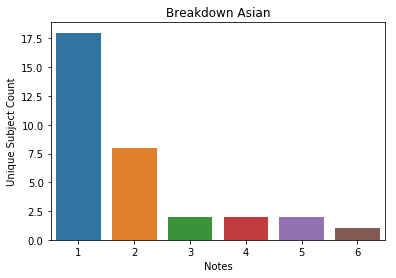

In [43]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['ASIAN'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['ASIAN'])
plt.title('Breakdown Asian')
plt.ylabel('Unique Subject Count')

Text(0, 0.5, 'Unique Subject Count')

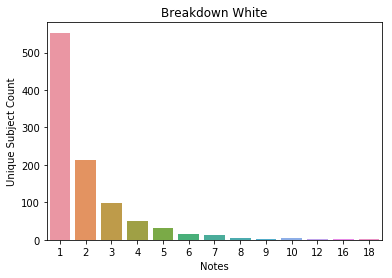

In [44]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['WHITE'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['WHITE'])
plt.title('Breakdown White')
plt.ylabel('Unique Subject Count')

Text(0, 0.5, 'Unique Subject Count')

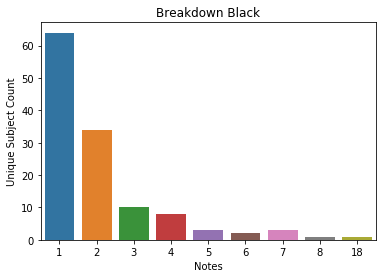

In [45]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['BLACK'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['BLACK'])
plt.title('Breakdown Black')
plt.ylabel('Unique Subject Count')

Text(0, 0.5, 'Unique Subject Count')

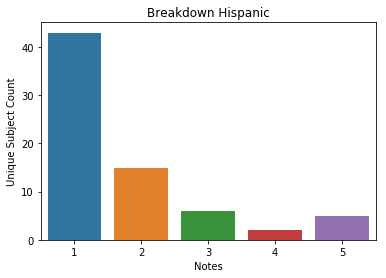

In [46]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['HISPANIC'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['HISPANIC'])
plt.title('Breakdown Hispanic')
plt.ylabel('Unique Subject Count')

Text(0, 0.5, 'Unique Subject Count')

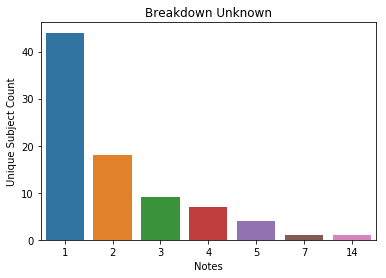

In [47]:
sns.barplot(x=summary.groupby(['RACE'])['Notes'].value_counts()['UNKNOWN'].index, y=summary.groupby(['RACE'])['Notes'].value_counts()['UNKNOWN'])
plt.title('Breakdown Unknown')
plt.ylabel('Unique Subject Count')

In [48]:
summary['RACE'].value_counts().sum()

1350

In [24]:
patient_race = patient_details[['SUBJECT_ID', 'RACE']]
patient_notes = social_work_only[['SUBJECT_ID', 'TEXT']]
notes_race_patient = pd.merge(patient_race, patient_notes, on = ['SUBJECT_ID'])

In [29]:
notes_race_patient = notes_race_patient.drop_duplicates('SUBJECT_ID', keep = 'first')

In [30]:
notes_race_patient['RACE'].value_counts()

WHITE       980
BLACK       126
UNKNOWN      83
HISPANIC     70
OTHER        45
ASIAN        33
Name: RACE, dtype: int64

In [31]:
len(notes_race_patient['TEXT'])

1337

In [32]:
notes_race_patient.TEXT = notes_race_patient.TEXT.fillna(' ')
notes_race_patient.TEXT = notes_race_patient.TEXT.str.replace('\n',' ')
notes_race_patient.TEXT = notes_race_patient.TEXT.str.replace('\r',' ')

C:\Users\aurno\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
import nltk
from nltk import word_tokenize

In [34]:
import string

In [35]:
punctuation_list = string.punctuation+'0123456789'
t = str.maketrans(dict.fromkeys(punctuation_list, " "))
notes_race_patient.TEXT = notes_race_patient.TEXT.str.lower().str.translate(t)

C:\Users\aurno\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
notes_race_patient.head()

,SUBJECT_ID,RACE,TEXT
0,109,BLACK,family information next of doctor first ...
34,111,WHITE,social work initial note family informatio...
36,904,WHITE,family information next of doctor first ...
64,1106,WHITE,family information next of doctor first ...
66,711,WHITE,family information next of doctor first ...


In [37]:
notes_race_patient.to_csv('social_work_race_patient_2.csv')

In [38]:
import re

In [39]:
from nltk import word_tokenize

In [40]:
def nltk_tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [41]:
notes_race_patient['TOKENIZED_TEXT'] = notes_race_patient['TEXT'].apply(nltk_tokenize)

C:\Users\aurno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
notes_race_patient.to_pickle("./tokenized_social_work_2_with_race.pkl")

In [43]:
notes_race_patient.head()

,SUBJECT_ID,RACE,TEXT,TOKENIZED_TEXT
0,109,BLACK,family information next of doctor first ...,"[family, information, next, of, doctor, first,..."
34,111,WHITE,social work initial note family informatio...,"[social, work, initial, note, family, informat..."
36,904,WHITE,family information next of doctor first ...,"[family, information, next, of, doctor, first,..."
64,1106,WHITE,family information next of doctor first ...,"[family, information, next, of, doctor, first,..."
66,711,WHITE,family information next of doctor first ...,"[family, information, next, of, doctor, first,..."


In [44]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

C:\Users\aurno\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train, test = train_test_split(notes_race_patient, test_size=0.1, random_state=42)

In [47]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words= r['TOKENIZED_TEXT'], tags=[r.RACE]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words= r['TOKENIZED_TEXT'], tags=[r.RACE]), axis=1)

In [48]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [49]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [50]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 603775.00it/s]


In [59]:
model_dm = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 603125.47it/s]


In [51]:
from sklearn import utils

In [52]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 607116.80it/s]


In [60]:
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

100%|█████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 1206250.95it/s]


In [53]:
model_dbow.save("doc2vec_model_social_work_dbow_2.model")

In [61]:
model_dm.save("doc2vec_dm_model_social_work_2.model")

In [54]:
def vec_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [56]:
y_train, x_train = vec_for_learning(model_dbow, train_tagged)
y_test, x_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.6567164179104478
Testing F1 score: 0.5567164179104478


C:\Users\aurno\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

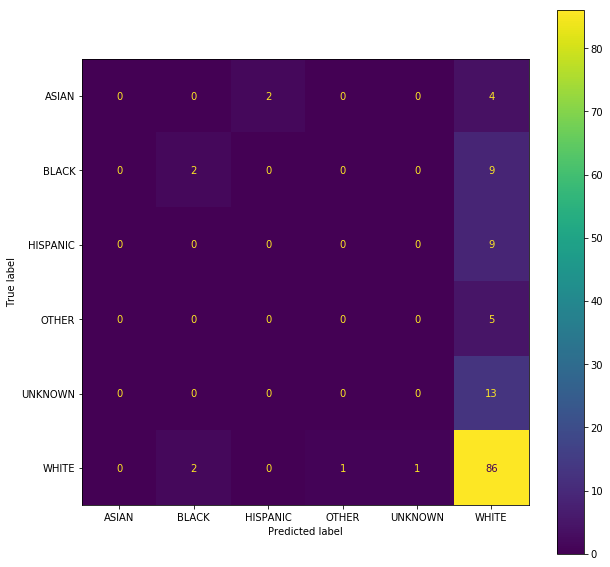

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(logreg, x_test, y_test, ax=ax)

In [87]:
import pickle
pkl_filename = "log_reg_model_social_notes.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logreg, file)

In [62]:
y_train, x_train = vec_for_learning(model_dm, train_tagged)
y_test, x_test = vec_for_learning(model_dm, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.6417910447761194
Testing F1 score: 0.525101763907734


C:\Users\aurno\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


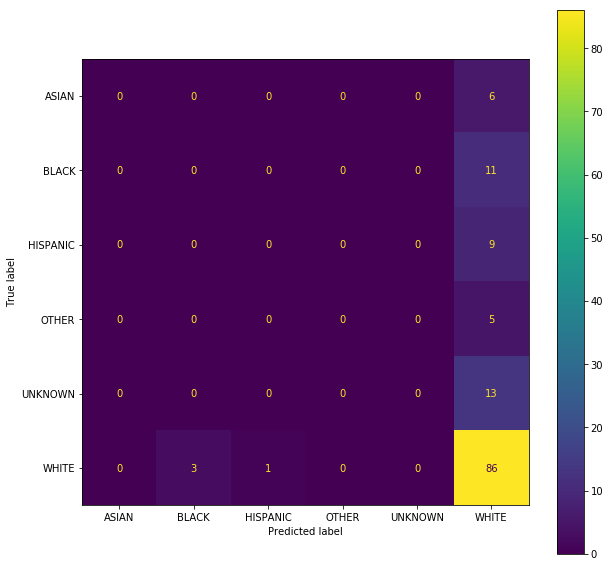

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(logreg, x_test, y_test, ax=ax)

In [53]:
import pickle
pkl_filename = "log_reg_model_social_notes_dm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logreg, file)

In [59]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dm])

In [61]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [62]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7896551724137931
Testing F1 score: 0.7635903552288897


C:\Users\aurno\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


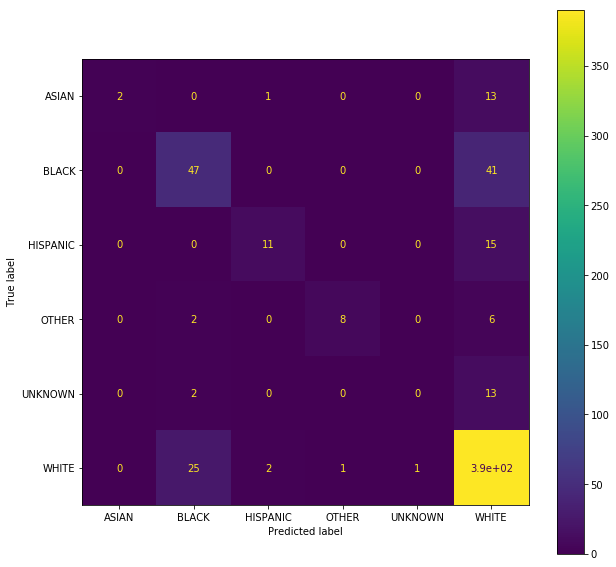

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)